In [1]:
from utils import prepare_data, set_variables
from plotting import plot_line_graph
from metrics import Pearson
from models import MultiBranch

In [2]:
train_data, valid_data, test_data = prepare_data()

### **2** |  Initializations

We use as baseline model the [RNATracker](https://github.com/HarveyYan/RNATracker/blob/master/Models/cnn_bilstm_attention.py) model and a CNN model.


In [10]:
max_seq_len = train_data['seq'].apply(lambda x: len(x)).max()
model_name = 'flor_CNN_Att10'
model_architecture_path, model_output_path, params_dataLoader_train, params_dataLoader_valid, params_branches, params_model, params_consensus, params_train = set_variables(model_name, max_seq_len, multibranch=True)

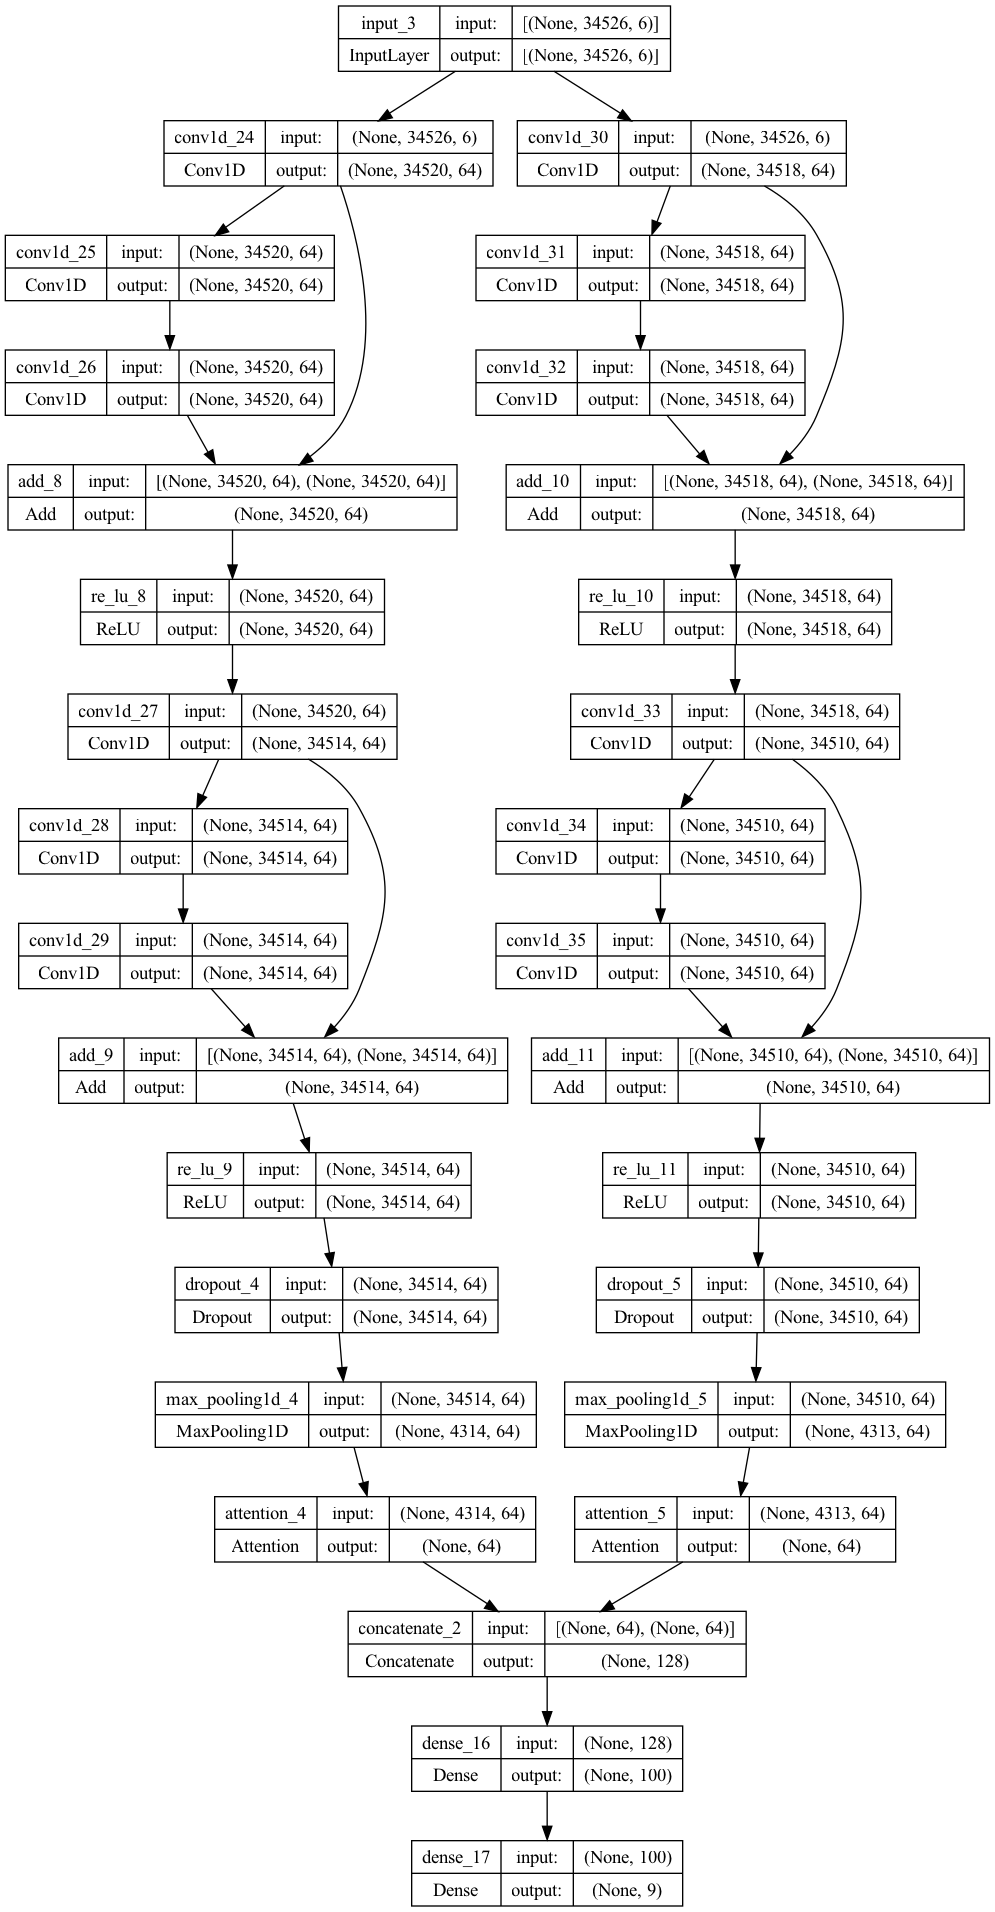

In [11]:
model = MultiBranch(input_size=(max_seq_len, 6),
                    param_branches=params_branches,
                    number_branches=2, 
                    param_consensus=params_consensus,
                    params_model= params_model,
                    metrics=[Pearson(return_dict=True)]
                    )

model.print_model()
# model.summary() #if information about number of params needed

In [12]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 34526, 6)]           0         []                            
                                                                                                  
 conv1d_24 (Conv1D)          (None, 34520, 64)            2688      ['input_3[0][0]']             
                                                                                                  
 conv1d_30 (Conv1D)          (None, 34518, 64)            3456      ['input_3[0][0]']             
                                                                                                  
 conv1d_25 (Conv1D)          (None, 34520, 64)            28736     ['conv1d_24[0][0]']           
                                                                                            

In [13]:
history = model.fit_and_evaluate(train_data=train_data, eval_data=valid_data, 
                                 params_train_dataLoader=params_dataLoader_train, 
                                 params_eval_dataLoader=params_dataLoader_valid, 
                                 params_train=params_train)

Epoch 1/10
311/311 [==============================] - 2010s 6s/step - loss: 7.1368 - ERM: 2.7298e-04 - KDEL: 4.7413e-04 - LMA: -1.5965e-04 - MITO: -9.5135e-05 - NES: -8.3652e-04 - NIK: 2.5419e-04 - NLS: 1.6242e-04 - NUCP: 7.0750e-04 - OMM: 9.0859e-04 - val_loss: 2.5434 - val_ERM: 7.0738e-13 - val_KDEL: 0.0000e+00 - val_LMA: 1.5158e-12 - val_MITO: 3.0316e-13 - val_NES: 0.0000e+00 - val_NIK: 0.0000e+00 - val_NLS: -2.1222e-12 - val_NUCP: 2.2689e-07 - val_OMM: 0.0000e+00
Epoch 2/10
311/311 [==============================] - 1923s 6s/step - loss: 2.5351 - ERM: -3.8819e-08 - KDEL: -1.3488e-07 - LMA: 1.0793e-08 - MITO: -1.2633e-07 - NES: -3.1269e-08 - NIK: -4.0582e-08 - NLS: -3.2599e-07 - NUCP: -1.6071e-07 - OMM: -9.2928e-08 - val_loss: 2.5298 - val_ERM: 0.0000e+00 - val_KDEL: 3.0316e-13 - val_LMA: 1.5158e-12 - val_MITO: 0.0000e+00 - val_NES: 0.0000e+00 - val_NIK: 0.0000e+00 - val_NLS: -2.1222e-12 - val_NUCP: -1.1369e-12 - val_OMM: 0.0000e+00
Epoch 3/10
311/311 [==============================

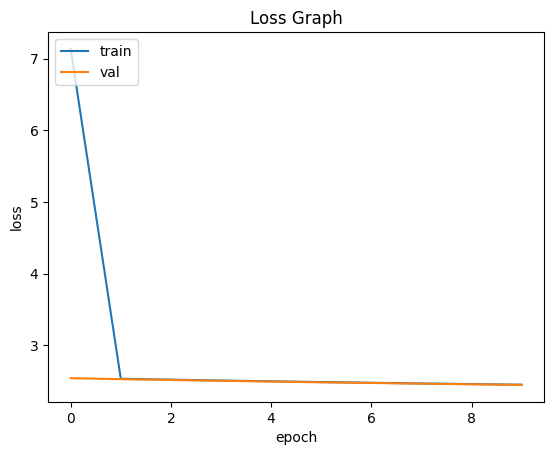

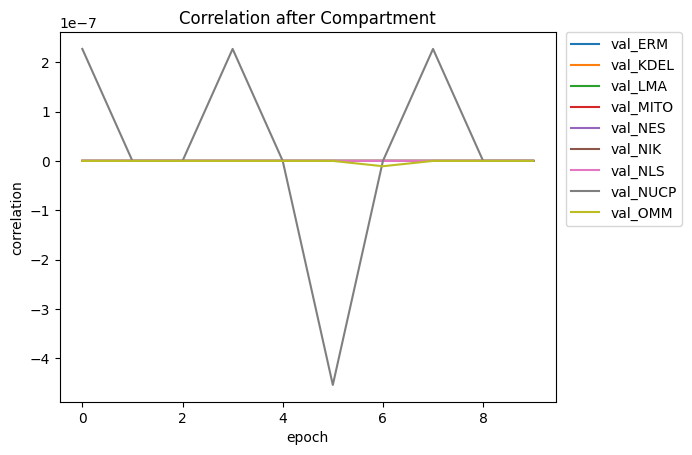

In [14]:
import matplotlib.pyplot as plt
from plotting import multiplot_pearson
plt_data = [history.history['loss'], history.history['val_loss']]
plot_line_graph(plt_data, "Loss Graph", 'loss', 'epoch', ['train', 'val'])

multiplot_pearson(history.history)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

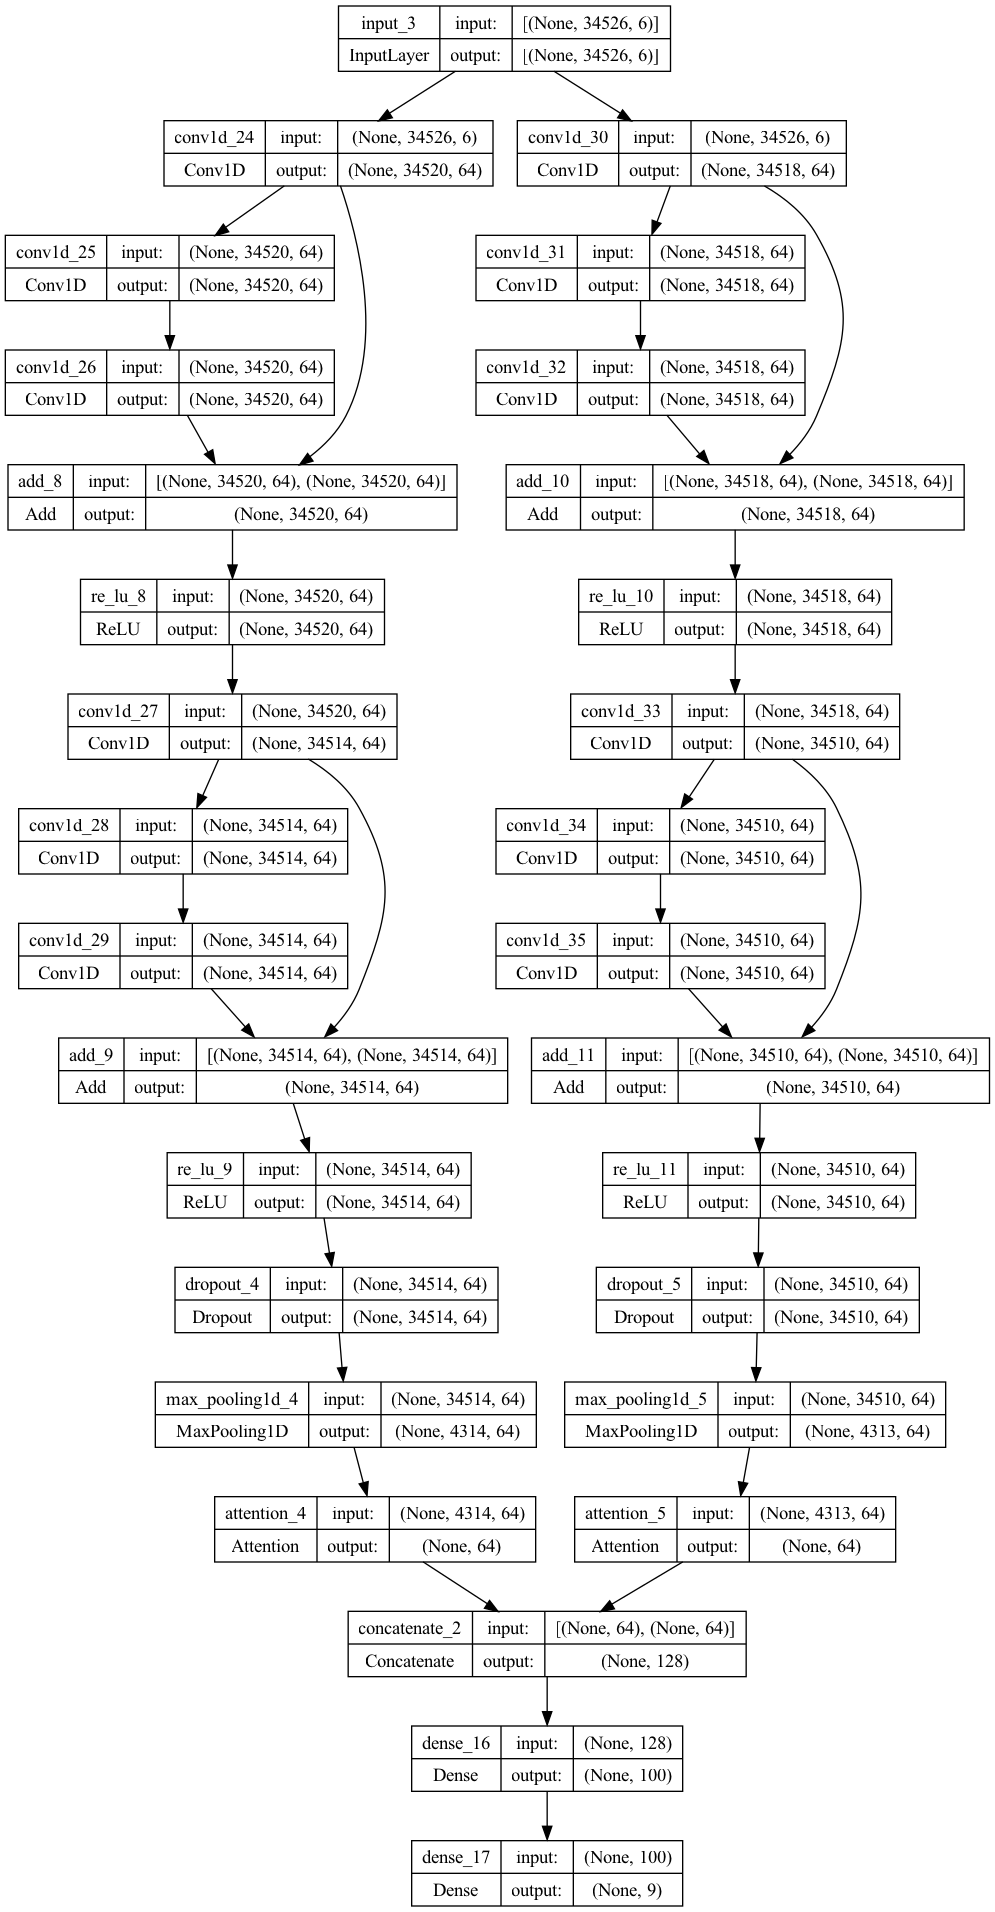

In [15]:
model.print_model(model_architecture_path)
#model.save_model(model_output_path)